In [174]:
import sys
import shutil
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot
from astropy.cosmology import Planck15
import corner

%matplotlib inline
%load_ext autoreload
%autoreload 2

catalog = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Move Skylocs

In [24]:
# This has been run!

nmc = 300
nobj = 1000
for imc in tqdm_notebook(range(200)):
    for iobj in tqdm_notebook(range(nobj)):
        shutil.move("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs_no0p5mask"+str(imc)+"/LL2_TSmx_lim_b_emin4_o"+str(iobj)+"_data.npz",\
                    "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs_no0p5mask_emin4/LL2_TSmx_lim_b_emin4_o"+str(iobj)+"_data_skyloc"+str(imc)+".npz")


In [2]:
# This has been run!

nmc = 300
nobj = 1000
for imc in tqdm_notebook(range(200)):
    for iobj in tqdm_notebook(range(nobj)):
        shutil.move("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs_no0p5mask/LL2_TSmx_lim_b_emin4_o"+str(iobj)+"_data_skyloc"+str(imc)+".npz",\
                    "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs_no0p5mask_emin4/LL2_TSmx_lim_b_emin4_o"+str(iobj)+"_data_skyloc"+str(imc)+".npz")


In [3]:
# This has not been run!

catalog = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

nmc = 200
nobj = 1000
for imc in tqdm_notebook(range(nmc)):
    lb_temp = []
    for iobj in tqdm_notebook(range(nobj)):
        rep_angext = np.array([0.02785567,0.12069876,0.21354185,0.30638494,0.39922802,0.49207111,0.5849142,0.67775728,0.77060037,0.86344346,0.95628654,1.04912963,1.14197272,1.2348158,1.32765889,1.42050198,1.51334507,1.60618815,1.69903124,1.79187433])
        obj_angext = 2*catalog[u'rs'].values[iobj] / \
                     (Planck15.angular_diameter_distance(catalog[u'z'].values[iobj]).value*1000) \
                     * 180./np.pi
        rep_index = (np.abs(rep_angext-obj_angext)).argmin()

        lb_temp.append(np.loadtxt("../data/Tully_randlocs"+str(int(np.loadtxt("../data/Tully_skylocs_no0p5mask"+str(imc)+"/skyloc_obj"+str(iobj)+".txt")))+"/lb_obj"+str(rep_index)+".dat"))
    np.save("../data/Tully_skylocs_no0p5mask_emin4/lb_cat_mc"+str(imc)+".npy", lb_temp)
    
    
    
    
    
    
    

In [18]:
nobj = 1000

for iobj in tqdm_notebook(range(nobj)):
    shutil.move("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_tau/LL2_TSmx_lim_\[Tau]_emin4_o"+str(iobj)+"_data.npz",\
                "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_tau/LL2_TSmx_lim_tau_emin4_o"+str(iobj)+"_data.npz")

In [19]:
for iobj in tqdm_notebook(range(nobj)):
    shutil.move("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_mu/LL2_TSmx_lim_\[Mu]_emin4_o"+str(iobj)+"_data.npz",\
                "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_mu/LL2_TSmx_lim_mu_emin4_o"+str(iobj)+"_data.npz")

# Figure 1

In [10]:
work_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/LimitPlot//'
plots_dir = '/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/plots/'
data_dir = work_dir + 'data/'

data_file_names =[ data_dir + f for f in ['stath_max-lim.dat','stath_min-lim.dat','statp_q16-lim.dat','statp_q84-lim.dat',
                  'Jcm_q16-lim.dat','Jcm_q84-lim.dat','GCE.dat','FermiDwarf.dat','nominal-data.dat','gce-abazajian.dat',
                                         'gce-calore.dat','gce-gordon.dat','thermal-relic.dat'  ] ]

data_files = [np.loadtxt(f) for f in data_file_names]

####Poisson error bands
massP = 10**data_files[2][::,0]
Lim16 = 10**data_files[2][::,1]
Lim84 = 10**data_files[3][::,1]
LimP_disp = (np.log10(Lim84) - np.log10(Lim16))/2.0

####Halo Stat error bands
massH = 10**data_files[4][::,0]
LimH16 = 10**data_files[4][::,1]
LimH84 = 10**data_files[5][::,1]
LimH_disp = (np.log10(LimH84) - np.log10(LimH16))/2.0


#####Combine the uncertainties
Lim_uncert = np.sqrt(LimP_disp**2 + LimH_disp**2)

###GCE
GCE = data_files[6]
GCE_ab = data_files[9]
GCE_calore = data_files[10]
GCE_gordan = data_files[11]

###Fermi Dwarf
massD = 10**data_files[8][::,0]
LimD = 10**data_files[8][::,1]

#####thermal
thermal = 10**data_files[12]

###Cross Corr
mDM_ary = [10,20,50,100,200,300,400,500,700,1000,10000]
lim_ary = np.array(np.array([[  3.47613312e-25,   3.19993932e-25,   4.09432255e-25,
          5.74111275e-25,   8.19273323e-25,   1.11412925e-24,
          1.54077804e-24,   1.88342427e-24,   2.45742289e-24,
          3.51413849e-24,   1.88285952e-23],
       [  6.84653178e-25,   6.11339438e-25,   8.88586835e-25,
          1.46856813e-24,   2.37706561e-24,   3.06228027e-24,
          3.78778553e-24,   4.28537842e-24,   5.06539081e-24,
          6.20444331e-24,   3.37611100e-23]]))


In [11]:
ab_mean = GCE_ab[0]
ab_up = GCE_ab[-1,1]
ab_low = GCE_ab[1,1]
ab_L = GCE_ab[3,0]
ab_R = GCE_ab[2,0]

In [12]:
plot_data_skylocs = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs_no0p5mask_emin4/',
                        elephant=False, 
                        nmc=200,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        data_type="skylocs",
                        skip_halos=[0])

# data_skylocs_ary, _, _ = plot_data_skylocs.return_limits()
# np.save("data_skylocs_ary_ecut4",data_skylocs_ary)
#data_skylocs_ary = np.load("data_skylocs_ary_ecut4.npy")

In [13]:
data_skylocs_ary = np.load("data_skylocs_ary_ecut4_200.npy")

In [6]:
plot_data = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        skip_halos=[0])

data_ary, _, maxTS_ary = plot_data.return_limits()

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [169]:
# np.save("included_halos", plot_data.passed_halos)

In [7]:
len(plot_data.passed_halos)

504

In [8]:
plot_data_nb = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully/////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                        file_prefix='LL2_TSmx_lim_b_nb_emin4_o',
                        skip_halos=[0])

data_ary_nb, _, _ = plot_data_nb.return_limits()

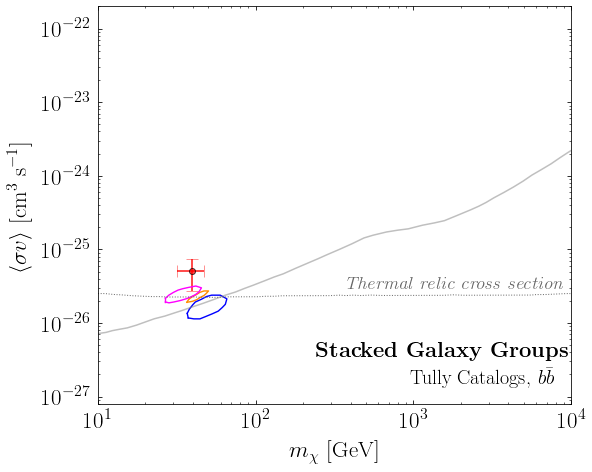

In [14]:
plot_h = 10/1.2
plot_w = 8/1.2

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

fudge = 1.02

# plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[len(data_ary)], 2.5, axis=1),10**np.percentile(data_skylocs_ary[len(data_ary)], 97.5, axis=1),color='yellow',label=r'95\% containment',alpha=0.6,lw=2)
# plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[len(data_ary)], 16, axis=1),10**np.percentile(data_skylocs_ary[len(data_ary)], 84, axis=1),color='limegreen',label=r'68\% containment',alpha=0.7,lw=2)

# plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Galaxy groups (this work)',lw=2.5)
# plt.plot(plot_data.marr,10**np.percentile(data_ary_nb[-1], 2.5, axis=1), alpha=1, color='k',ls='--',label=r'Galaxy groups (no boost)',lw=2.5)


plt.plot(10**GCE[::,0],10**GCE[::,1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE[[0,-1],0],10**GCE[[0,-1],1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE_calore[::,0],10**GCE_calore[::,1],color='blue',alpha = 1.0,lw=1.4) #label = r'Daylan et. al. 2014 (2$\sigma$)',alpha=0.5)
plt.plot(10**GCE_calore[[0,-1],0],10**GCE_calore[[0,-1],1],color='blue',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[::,0],10**GCE_gordan[::,1],color='magenta',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[[0,-1],0],10**GCE_gordan[[0,-1],1],color='magenta',alpha = 1.0,lw=1.4)
plt.errorbar([10**ab_mean[0]],[10**ab_mean[1]],yerr = [ np.array([10**ab_mean[1] - 10**ab_low]), np.array([10**ab_up - 10**ab_mean[1] ]) ],
            xerr = [ np.array([10**ab_mean[0] - 10**ab_L]), np.array([10**ab_R - 10**ab_mean[0] ]) ],color='red',
            linewidth=2.0, capsize=6,capthick=.6,markersize=6,marker='o',alpha=0.7,mec='k')

plt.plot(massD,LimD,color='grey',label = r'$\mathit{Fermi}$ dwarfs (2016)',alpha=0.5)

plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)

# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0],handles[4], handles[3],handles[1],handles[2]] #, handles[2]]
# labels = [labels[0], handles[1],labels[4],labels[3],labels[2]] #, labels[2]]

# labels = [u'Galaxy groups (this work)',
#  u'95\\% containment',
#  u'68\\% containment',
#           u'Galaxy groups, no boost',
#  u'$\\mathit{Fermi}$ dwarfs (2016)']

# leg = plt.legend(handles,labels,loc=2,fontsize=17,fancybox=True,facecolor='none',frameon=False)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(200, 3.5e-27, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
plt.text(950.3, 1.5e-27, r'Tully Catalogs, $b\bar b$',fontsize=20,color='black')
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')

plt.tight_layout()

# plt.savefig(plots_dir + 'dwarfs_ecut4.pdf',bbox_inches='tight')



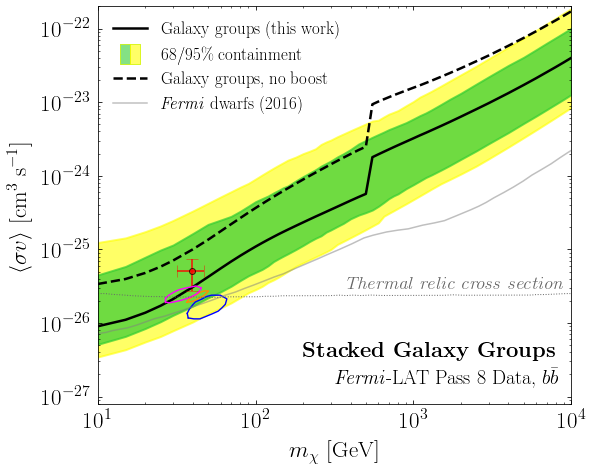

In [297]:
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

fudge = 1.02

plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[len(data_ary)], 2.5, axis=1),10**np.percentile(data_skylocs_ary[len(data_ary)], 97.5, axis=1),color='yellow',label=r'95\% containment',alpha=0.6,lw=2)
plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[len(data_ary)], 16, axis=1),10**np.percentile(data_skylocs_ary[len(data_ary)], 84, axis=1),color='limegreen',label=r'68\% containment',alpha=0.7,lw=2)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Galaxy groups (this work)',lw=2.5)
plt.plot(plot_data.marr,10**np.percentile(data_ary_nb[-1], 2.5, axis=1), alpha=1, color='k',ls='--',label=r'Galaxy groups (no boost)',lw=2.5)


plt.plot(10**GCE[::,0],10**GCE[::,1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE[[0,-1],0],10**GCE[[0,-1],1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE_calore[::,0],10**GCE_calore[::,1],color='blue',alpha = 1.0,lw=1.4) #label = r'Daylan et. al. 2014 (2$\sigma$)',alpha=0.5)
plt.plot(10**GCE_calore[[0,-1],0],10**GCE_calore[[0,-1],1],color='blue',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[::,0],10**GCE_gordan[::,1],color='magenta',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[[0,-1],0],10**GCE_gordan[[0,-1],1],color='magenta',alpha = 1.0,lw=1.4)
plt.errorbar([10**ab_mean[0]],[10**ab_mean[1]],yerr = [ np.array([10**ab_mean[1] - 10**ab_low]), np.array([10**ab_up - 10**ab_mean[1] ]) ],
            xerr = [ np.array([10**ab_mean[0] - 10**ab_L]), np.array([10**ab_R - 10**ab_mean[0] ]) ],color='red',
            linewidth=2.0, capsize=6,capthick=.6,markersize=6,marker='o',alpha=0.7,mec='k')

plt.plot(massD,LimD,color='grey',label = r'$\mathit{Fermi}$ dwarfs (2016)',alpha=0.5)

plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)


m3, = plt.plot([], [], c='limegreen' , marker='s', markersize=20,
              fillstyle='left', linestyle='none',alpha=0.6)

m4, = plt.plot([], [], c='yellow' , marker='s', markersize=20,
              fillstyle='right', linestyle='none',alpha=0.6)


handles,labels = ax.get_legend_handles_labels()
handles = [handles[0],(m3,m4),handles[1],handles[2]] #, handles[2]]
labels = [labels[0], '$68/95\%$ containment','Galaxy groups, no boost',labels[2]] #, labels[2]]

labels = [u'Galaxy groups (this work)',
'$68/95\%$ containment',
          u'Galaxy groups, no boost',
 u'$\\mathit{Fermi}$ dwarfs (2016)']

leg = plt.legend(handles,labels,loc=2,fontsize=17,fancybox=True,facecolor='none',frameon=False)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(200, 3.5e-27, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
plt.text(320., 1.5e-27, r'\emph{Fermi}-LAT Pass 8 Data, $b\bar b$',fontsize=20,color='black')
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')

plt.tight_layout()

plt.savefig(plots_dir + 'bounds.pdf',bbox_inches='tight')

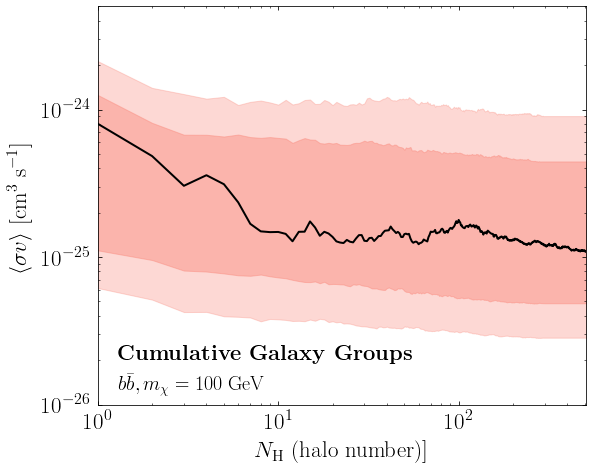

In [46]:
midx = 11
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

plt.plot(np.arange(len(data_ary[:,midx,:])) + 1,10**np.percentile(data_ary[:,midx,:],[50],axis=1)[0], color='k',lw=2)
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[2.5],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[97.5],axis=1)[0], alpha=0.3, color='salmon')
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[16],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[84],axis=1)[0], alpha=0.4, color='salmon')

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$N_\mathrm{H}$ (halo number)]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
plt.xlim(1,len(data_ary[:,midx,:]) + 1) 
#     plt.xlim([1e1,1e4])
plt.ylim([1.e-26,5.e-24])

plt.text(1.3, 2e-26, r'\textbf{Cumulative Galaxy Groups}',fontsize=22,color='black')
plt.text(1.3, 1.2e-26, r'$b\bar b, m_\chi = 100$ GeV',fontsize=20,color='black')
plt.tight_layout()

plt.savefig(plots_dir + 'elephant.pdf',bbox_inches='tight')

## Other elephants

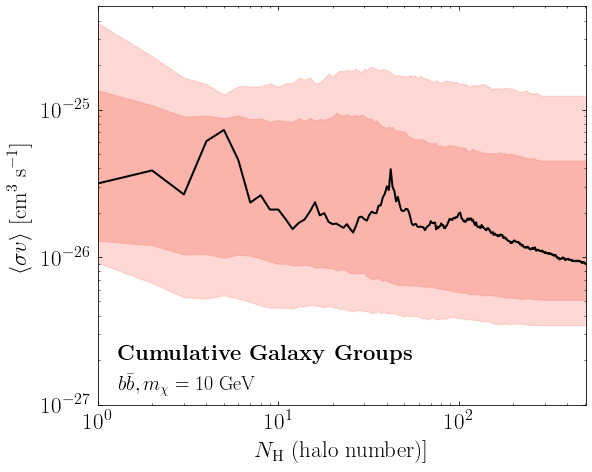

In [45]:
midx = 0
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

plt.plot(np.arange(len(data_ary[:,midx,:])) + 1,10**np.percentile(data_ary[:,midx,:],[50],axis=1)[0], color='k',lw=2)
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[2.5],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[97.5],axis=1)[0], alpha=0.3, color='salmon')
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[16],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[84],axis=1)[0], alpha=0.4, color='salmon')

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$N_\mathrm{H}$ (halo number)]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
plt.xlim(1,len(data_ary[:,midx,:]) + 1) 
#     plt.xlim([1e1,1e4])
plt.ylim([1.e-27,5e-25])

plt.text(1.3, 2.e-27, r'\textbf{Cumulative Galaxy Groups}',fontsize=22,color='black')
plt.text(1.3, 1.2e-27, r'$b\bar b, m_\chi = 10$ GeV',fontsize=20,color='black')
plt.tight_layout()

plt.savefig(plots_dir + 'elephant10.pdf',bbox_inches='tight')





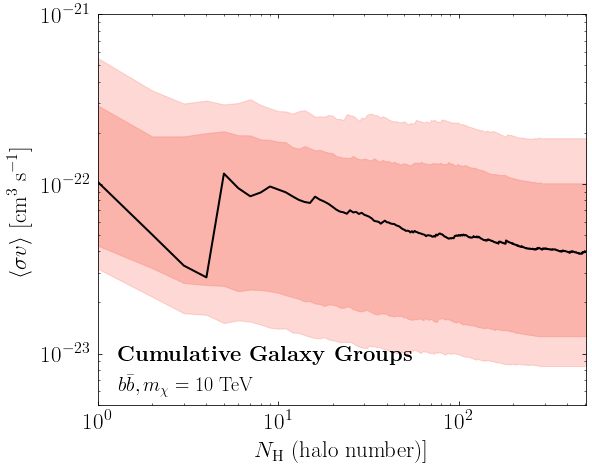

In [40]:
midx = 52
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

plt.plot(np.arange(len(data_ary[:,midx,:])) + 1,10**np.percentile(data_ary[:,midx,:],[50],axis=1)[0], color='k',lw=2)
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[2.5],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[97.5],axis=1)[0], alpha=0.3, color='salmon')
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[16],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[84],axis=1)[0], alpha=0.4, color='salmon')

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$N_\mathrm{H}$ (halo number)]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
plt.xlim(1,len(data_ary[:,midx,:]) + 1) 
#     plt.xlim([1e1,1e4])
plt.ylim([5e-24,1e-21])

plt.text(1.3, 9e-24, r'\textbf{Cumulative Galaxy Groups}',fontsize=22,color='black')
plt.text(1.3, 5.8e-24, r'$b\bar b, m_\chi = 10$ TeV',fontsize=20,color='black')
plt.tight_layout()

plt.savefig(plots_dir + 'elephant10000.pdf',bbox_inches='tight')

# Tables

In [254]:
catalog = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_extra2_v7.csv")

In [255]:
catalog.columns.values

array(['Unnamed: 0', 'Name', 'mulog10J_inf', 'siglog10J_inf',
       'mulog10Jnb_inf', 'siglog10Jnb_inf', 'mulog10JB_inf',
       'siglog10JB_inf', 'mulog10JBnb_inf', 'siglog10JBnb_inf',
       'mulog10D_inf', 'siglog10D_inf', 'log10Mvir_inf',
       'sigmalog10Mvir_inf', 'z', 'Nest', 'Ng', 'l', 'b', 'cvir_inf',
       'sigmalog10cvir_inf', 'rvir_inf', 'rs', 'ID_2MASXJ', 'Bib_z',
       'GName', '3FGL 0.5', '3FGL 1', '3FGL 2', '3FGL 5', '3FGL 10',
       'N3FGL 5', 'ang_ext', 'theta_vir', 'log10M200_inf', 'ra', 'dec',
       'dA'], dtype=object)

In [256]:
catalog['zred'] = catalog['z']*1000
catalog['log10cvir_inf'] = np.log10(catalog['cvir_inf'])
catalog['theta_s'] = catalog['ang_ext']/2.
catalog['bsh'] = 10**catalog['mulog10J_inf']/10**catalog['mulog10Jnb_inf'] - 1
catalog['paperName'] = [catalog['GName'][i] if isinstance(catalog['GName'][i], str) else catalog['Name'][i] for i in range(len(catalog))]

In [257]:
catalog['log10Jerr'] = [str(catalog['mulog10J_inf'].values[i]) [:5] +str('$\\pm$') + str(catalog['siglog10J_inf'].values[i]) [:4] for i in range(len(catalog))]#[:4]

In [258]:
catalog['log10cerr'] = [str(catalog['log10cvir_inf'].values[i]) [:4] +str('$\\pm$') + str(catalog['sigmalog10cvir_inf'].values[i]) [:4] for i in range(len(catalog))]#[:4]

In [259]:
catalog['log10Merr'] = [str(catalog['log10Mvir_inf'].values[i]) [:4] +str('$\\pm$') + str(catalog['sigmalog10Mvir_inf'].values[i]) [:4] for i in range(len(catalog))]#[:4]

In [260]:
catalog['in'] = ['\checkmark' if i in plot_data.passed_halos else '' for i in range(len(catalog))]#[:4]

In [261]:
catalog_paper = catalog.iloc[plot_data.passed_halos][['paperName','log10Jerr','log10Merr','zred','l','b','log10cerr','theta_s','bsh']].round(2).to_latex(index = False)

In [262]:
print catalog_paper

\begin{tabular}{lllrrrlrr}
\toprule
            paperName &       log10Jerr &      log10Merr &   zred &       l &      b &      log10cerr &  theta\_s &   bsh \\
\midrule
                Virgo &  19.11\$\textbackslashpm\$0.35 &  14.6\$\textbackslashpm\$0.14 &   3.58 &  283.78 &  74.49 &  0.80\$\textbackslashpm\$0.18 &     1.16 &  4.53 \\
              NGC0253 &  18.76\$\textbackslashpm\$0.37 &  12.7\$\textbackslashpm\$0.12 &   0.79 &   98.24 & -87.89 &  1.00\$\textbackslashpm\$0.17 &     0.77 &  2.90 \\
              NGC3031 &  18.58\$\textbackslashpm\$0.36 &  12.6\$\textbackslashpm\$0.12 &   0.83 &  141.88 &  40.87 &  1.02\$\textbackslashpm\$0.17 &     0.64 &  2.76 \\
            Centaurus &  18.34\$\textbackslashpm\$0.35 &  14.6\$\textbackslashpm\$0.14 &   8.44 &  302.22 &  21.65 &  0.80\$\textbackslashpm\$0.18 &     0.48 &  4.50 \\
              NGC1399 &  18.31\$\textbackslashpm\$0.37 &  13.8\$\textbackslashpm\$0.13 &   4.11 &  236.62 & -53.88 &  0.89\$\textbackslashpm\$0.17 &     0

In [264]:
catalog_app = catalog[:30][['paperName','log10Jerr','log10Merr','zred','l','b','log10cerr','theta_s','bsh']]

In [265]:
catalog_app['maxTS'] = [np.load("../data/Tully/LL2_TSmx_lim_b_o" + str(iobj) + "_data.npz")['TSmx'][0] for iobj in tqdm_notebook(range(len(catalog_app)))]

In [266]:
catalog_app['in'] = catalog['in']

In [267]:
print catalog_app.round(2).to_latex(index = False)

\begin{tabular}{lllrrrlrrrl}
\toprule
  paperName &       log10Jerr &      log10Merr &   zred &       l &      b &      log10cerr &  theta\_s &   bsh &  maxTS &          in \\
\midrule
  Andromeda &  19.79\$\textbackslashpm\$0.36 &  12.4\$\textbackslashpm\$0.12 &   0.17 &  121.51 & -21.79 &  1.04\$\textbackslashpm\$0.17 &     2.57 &  2.64 &   3.01 &             \\
      Virgo &  19.11\$\textbackslashpm\$0.35 &  14.6\$\textbackslashpm\$0.14 &   3.58 &  283.78 &  74.49 &  0.80\$\textbackslashpm\$0.18 &     1.16 &  4.53 &   1.05 &  \textbackslashcheckmark \\
    NGC5128 &  18.89\$\textbackslashpm\$0.37 &  12.9\$\textbackslashpm\$0.12 &   0.82 &  307.88 &  17.08 &  0.99\$\textbackslashpm\$0.17 &     0.88 &  3.14 &   0.00 &             \\
    NGC0253 &  18.76\$\textbackslashpm\$0.37 &  12.7\$\textbackslashpm\$0.12 &   0.79 &   98.24 & -87.89 &  1.00\$\textbackslashpm\$0.17 &     0.77 &  2.90 &   0.57 &  \textbackslashcheckmark \\
   Maffei 1 &  18.68\$\textbackslashpm\$0.37 &  12.6\$\textba

In [102]:
catalog_lu = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLu_ALL_DATAPAPER_Planck15_v5.csv")

In [103]:
catalog_lu['zred'] = catalog_lu['z']*1000
catalog_lu['log10cvir_inf'] = np.log10(catalog_lu['cvir_inf'])
catalog_lu['bsh'] = 10**catalog_lu['mulog10J_inf']/10**catalog_lu['mulog10Jnb_inf'] - 1
catalog_lu['paperName'] = [catalog_lu['Name'].values[i] for i in range(len(catalog_lu))]

In [104]:
catalog_lu_app = catalog_lu[:100][['paperName','mulog10J_inf','log10Mvir_inf','zred','l','b','log10cvir_inf', 'ang_ext','bsh']]

In [105]:
catalog_lu_app['maxTS'] = [np.load("../data/Lu/LL2_TSmx_lim_b_o" + str(iobj) + "_data.npz")['TSmx'][0] for iobj in range(len(catalog_lu_app))]

In [57]:
# print catalog_lu_app.round(2).to_latex(index = False)

NameError: name 'catalog_lu_app' is not defined

# Sky maps

In [135]:
l = catalog['l'][plot_data.passed_halos].values
b = catalog['b'][plot_data.passed_halos].values
s = 1000*10**catalog['mulog10J_inf'][plot_data.passed_halos].values/10**catalog['mulog10J_inf'][plot_data.passed_halos].values[0]

In [ ]:
import healpy as hp
hp.mollview(np.zeros(hp.nside2npix(128)))
hp.projscatter(l, b, lonlat=True, coord='G', marker='o', color='orange',s = s)
# for i in tqdm_notebook(range(len(l))):
#     hp.projscatter(l[i], b[i], lonlat=True, coord='G', marker='o', color='orange',s = s[i])

In [ ]:
oFig1 = plt.figure(1,figsize=(10,60))

lbrange = 5
from tools import lb2pix
    

for ie in tqdm(range(10)):
    
    the_map = hp.ma(f_global.CTB_count_maps[ie])
    the_map.mask = f_global.ps_mask_array[10] > 0
    nhalos = 1


    
    l = 283.7777978  
    b = 74.4911308

    hp.cartview(the_map, max = 8, rot=(l,b), lonra=[-lbrange,lbrange],latra=[-lbrange,lbrange], title=dftop['Name'].values[idx].replace("_", " "),sub=(5,2,ie+1))


    hp.projscatter(l, b, lonlat=True, coord='G', marker='x', color='k')

    hp.projscatter(286.922184 ,  70.196040, lonlat=True, coord='G', marker='x', color='k')



    l = source_3fg_df['_Lii']
    b =source_3fg_df['_Bii']

    hp.projscatter(l, b, lonlat=True, coord='G', marker='*', color='orange')

#     plt.savefig("Mask_Object_"+"%02d" % (idx+1,)+".pdf")


# Other channels

In [50]:
plot_data_channels = []

for channel in tqdm_notebook(['e','mu','tau','q','c','t','W','Z']):
# for channel in tqdm_notebook(['tau']):

    channel_str = channel

    plot_data_temp = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_'+channel+'/////',
                            elephant=False, 
                            nmc=1,
                            bcut=20,
                            nonoverlap=True,
                            nonoverlapradius=2.,
                            cut_0p5=False,
                            xsecslim=10,
                            TS100=9,
                            TS1000=9,
                            halos_ran=1000, 
                            halos_to_keep=1000,
                            data_type="data",
                            catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                            file_prefix=r'LL2_TSmx_lim_'+channel_str+r'_emin4_o')

    plot_data_channels.append(plot_data_temp)

In [51]:
data_ary_channels = []

for i in range(len(tqdm_notebook(plot_data_channels))):
    data_ary_channels.append(plot_data_channels[i].return_limits())

In [52]:
plot_colors = ["forestgreen","forestgreen","forestgreen","goldenrod","goldenrod","goldenrod","lightcoral","lightcoral"]
plot_ls = ["-","--","-.","-","--","-.","-","--"]

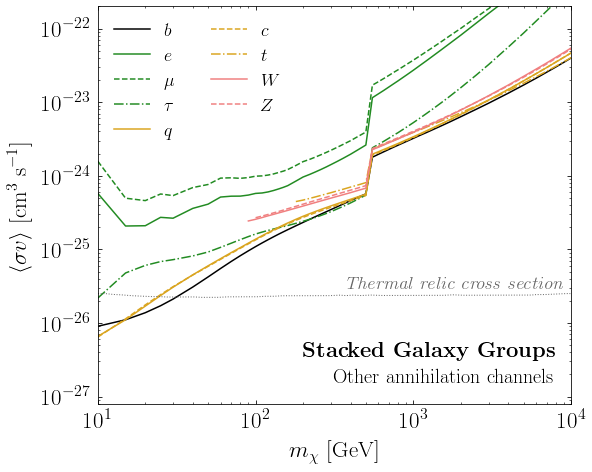

In [62]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'$b$')



for i, label in enumerate((['e','mu','tau','q','c','t','W','Z'])):
    if label in ["mu","tau"]:
        label = "\\" + label
    label = "$" + label + "$"    
    plt.plot(plot_data.marr,[None if v == 1.0 else v for v in 10**np.percentile(data_ary_channels[i][0][-1], 16, axis=1)], label=label, color=plot_colors[i],ls=plot_ls[i])

plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(200.3, 3.5e-27, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
plt.text(310.3, 1.5e-27, r'Other annihilation channels',fontsize=20,color='black')

plt.legend(ncol=2,fancybox=True,facecolor='none',frameon=False,loc='upper left')

plt.tight_layout()

plt.savefig(plots_dir + 'other_annh.pdf',bbox_inches='tight')




# Systematics

In [63]:
plot_data_Lu = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Lu//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                         file_prefix='LL2_TSmx_lim_b_emin4_o',
                         skip_halos=[],
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLu_ALL_DATAPAPER_Planck15_v5.csv")

In [64]:
data_ary_Lu, _,_ = plot_data_Lu.return_limits()

In [65]:
plot_data_p7 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_p7///',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [66]:
data_ary_p7, _, _ = plot_data_p7.return_limits()

In [67]:
plot_data_UCV3 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_UCV3///',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                           file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [68]:
data_ary_UCV3, _,_ = plot_data_UCV3.return_limits()

In [69]:
plot_data_useboost = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_useboost////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [70]:
data_ary_useboost, _,_ = plot_data_useboost.return_limits()

In [71]:
plot_data_Burkert = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_Burkert///',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                        file_prefix="LL2_TSmx_lim_b_Burk_emin4_o")

In [72]:
data_ary_Burkert, _,_ = plot_data_Burkert.return_limits()

In [204]:
np.load('/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_sigmaconc0p24/LL2_TSmx_lim_b_emin4_o100_data.npz')['LL2']

array([[   29870.62026505,    29870.62026505,    29870.62026505, ...,
        -3897128.59329732, -4378600.40581916, -4918879.14595538],
       [   29870.62026505,    29870.62026505,    29870.62026505, ...,
        -2786658.42472189, -3132425.5910892 , -3520444.44965774],
       [   29870.62026505,    29870.62026505,    29870.62026505, ...,
        -2076920.42525556, -2335912.31675568, -2626566.81792186],
       ..., 
       [  -60423.37965992,   -60423.37965992,   -60423.37965992, ...,
          -60590.79837014,   -60611.5443834 ,   -60635.06341068],
       [  -60423.37965992,   -60423.37965992,   -60423.37965992, ...,
          -60561.78255384,   -60578.64313993,   -60597.75470832],
       [  -60423.37965992,   -60423.37965992,   -60423.37965992, ...,
          -60540.42965546,   -60554.44416132,   -60570.30899387]])

In [208]:
plot_data_sigmaconc0p24 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=False,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=100, 
                        halos_to_keep=100,
                        data_type="data",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv"
                                )

In [209]:
data_ary_sigmaconc0p24, _, _ = plot_data_sigmaconc0p24.return_limits()

In [73]:
plot_data_diemerconc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_diemerconc///',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_diemerconc_v7.csv"
                                )

In [74]:
data_ary_diemerconc, _,_ = plot_data_diemerconc.return_limits()

In [75]:
plot_data_gaoboost = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_gaoboost////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_gaoboost_v7.csv"
                                )

In [76]:
data_ary_gaoboost, _,_ = plot_data_gaoboost.return_limits()

In [77]:
plot_data_mmin1e4 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_mmin1e4////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_mmin1e4_v7.csv"
                                )

In [78]:
data_ary_mmin1e4, _,_ = plot_data_mmin1e4.return_limits()

In [79]:
plot_data_sanchezboost = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_sanchezboost/////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_sanchezboost_v7.csv"
                                )

In [80]:
data_ary_sanchezboost, _,_ = plot_data_sanchezboost.return_limits()

In [81]:
plot_data_alpha20 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_sanchezboost/////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_alpha20_v7.csv"
                                )

In [82]:
data_ary_alpha20, _,_ = plot_data_alpha20.return_limits()

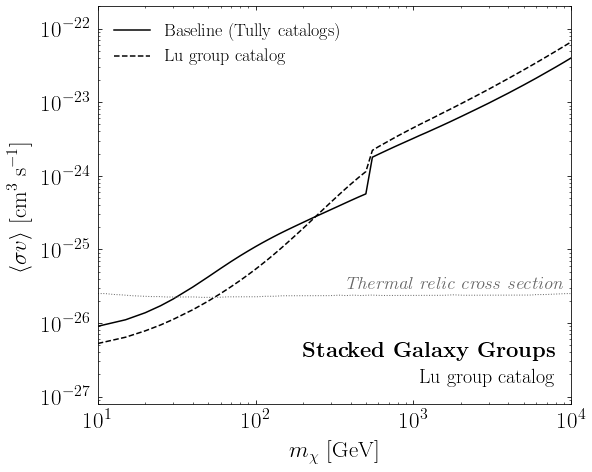

In [101]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline (Tully catalogs)')
plt.plot(plot_data.marr,10**np.percentile(data_ary_Lu[-1], 2.5, axis=1), alpha=1, color='k',label=r'Lu group catalog',ls='--')



plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(200, 3.5e-27, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
plt.text(1100.3, 1.5e-27, r'Lu group catalog',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_lu.pdf',bbox_inches='tight')

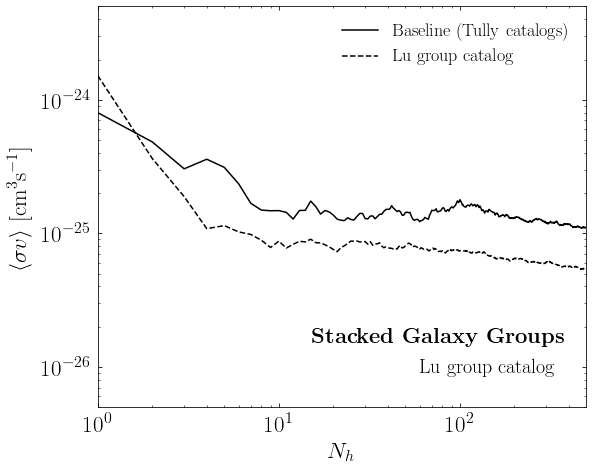

In [102]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

for midx in [11]:
    plt.plot(np.arange(len(data_ary[:,midx,:])) + 1,10**np.percentile(data_ary[:,midx,:],[50],axis=1)[0], color='k', ls='-', label="Baseline (Tully catalogs)")
    plt.plot(np.arange(len(data_ary_Lu[:,midx,:])) + 1,10**np.percentile(data_ary_Lu[:,midx,:],[50],axis=1)[0], color='k', ls='--', label="Lu group catalog")


#     plt.title("$M_\chi$ = " + str(int(plot_data_skylocs.marr[midx])) + " GeV")
    
    plt.xlabel("$N_h$",fontsize=23)
    plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]",fontsize=23)
    
    plt.xscale("log")
    plt.yscale("log")
    
    plt.xticks(fontsize=23);
    plt.yticks(fontsize=23);

    plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)
    plt.text(15.3, 1.5e-26, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
    plt.text(60.3, 0.9e-26, r'Lu group catalog',fontsize=20,color='black')


    plt.ylim(5e-27,5e-24)
    plt.xlim(min(np.arange(len(data_ary_Lu[:,midx,:]))),max(np.arange(len(data_ary_Lu[:,midx,:]))))
    plt.tight_layout()


    plt.savefig(plots_dir + "systematics_lu_elephant.pdf")
    plt.show()

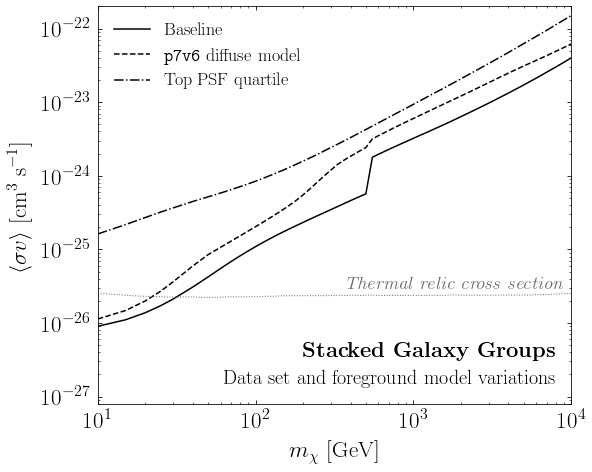

In [103]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline')
plt.plot(plot_data.marr,10**np.percentile(data_ary_p7[-1], 2.5, axis=1), alpha=1, color='k',label=r'\texttt{p7v6} diffuse model',ls='--')
plt.plot(plot_data.marr,10**np.percentile(data_ary_UCV3[-1], 2.5, axis=1), alpha=1, color='k',label=r'Top PSF quartile',ls='-.')




plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(200, 3.5e-27, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
plt.text(63., 1.5e-27, r'Data set and foreground model variations',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_dataset.pdf',bbox_inches='tight')

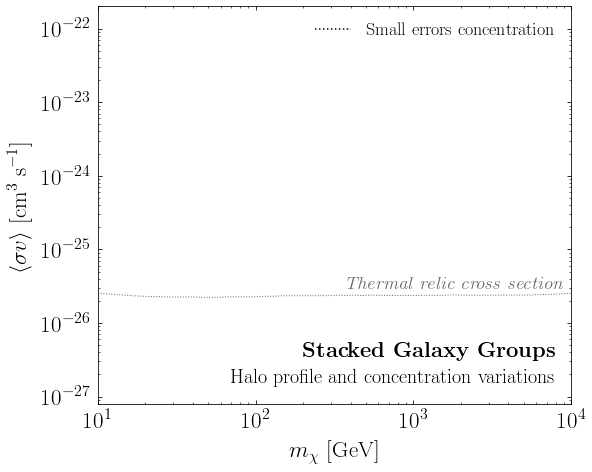

In [179]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

# plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline')
# plt.plot(plot_data.marr,10**np.percentile(data_ary_useboost[-1], 2.5, axis=1), alpha=1, color='k',label=r'$\rho_\mathrm{NFW}$-boosted profile',ls='--')
# plt.plot(plot_data.marr,10**np.percentile(data_ary_Burkert[-1], 2.5, axis=1), alpha=1, color='k',label=r'Burkert profile',ls='-.')
# plt.plot(plot_data.marr,10**np.percentile(data_ary_diemerconc[-1], 2.5, axis=1), alpha=1, color='k',label=r'Diemer concentration',ls=':')
plt.plot(plot_data.marr,10**np.percentile(data_ary_sigmaconc0p24[-1], 2.5, axis=1), alpha=1, color='k',label=r'Small errors concentration',ls=':')






plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(200, 3.5e-27, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
plt.text(70.3, 1.5e-27, r'Halo profile and concentration variations',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

# plt.savefig(plots_dir + 'systematics_profile_conc.pdf',bbox_inches='tight')

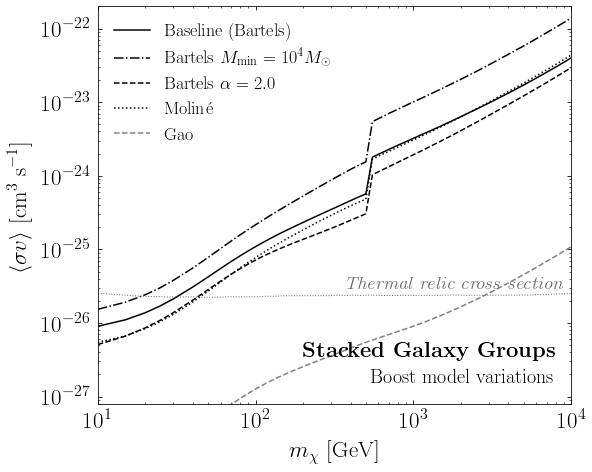

In [105]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline (Bartels)')
plt.plot(plot_data.marr,10**np.percentile(data_ary_mmin1e4[-1], 2.5, axis=1), alpha=1, color='k',label=r'Bartels $M_\mathrm{min} = 10^{4}M_\odot$',ls='-.')
plt.plot(plot_data.marr,10**np.percentile(data_ary_alpha20[-1], 2.5, axis=1), alpha=1, color='k',label=r'Bartels $\alpha = 2.0$',ls='--')
plt.plot(plot_data.marr,10**np.percentile(data_ary_sanchezboost[-1], 2.5, axis=1), alpha=1, color='k',label=r"{Molin\'{e}}",ls=':')
plt.plot(plot_data.marr,10**np.percentile(data_ary_gaoboost[-1], 2.5, axis=1), alpha=1, color='grey',label=r'Gao',ls='--')







plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(200, 3.5e-27, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
plt.text(540.3, 1.5e-27, r'Boost model variations',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_boost.pdf',bbox_inches='tight')

# Individual halos

In [33]:
plot_data.passed_halos[:10]

[1, 3, 6, 7, 8, 10, 12, 14, 20, 21]

In [36]:
plot_single_mcs = []
plot_single_datas = []

maxts_single_mcs = []
maxts_single_datas = []


for i in tqdm_notebook(plot_data.passed_halos[:10]):
    plot_single_mc, _, maxts_single_mc  = plot_data_skylocs.return_limits_single(i)
    plot_single_data, _, maxts_single_data= plot_data.return_limits_single(i)
    
    plot_single_mcs.append(plot_single_mc)
    plot_single_datas.append(plot_single_data)
    
    maxts_single_mcs.append(maxts_single_mc)
    maxts_single_datas.append(maxts_single_data)

In [37]:

# plot_single_datas_lu = []

# for i in tqdm_notebook(range(10)):
#     plot_single_data_lu, _, _= plot_data_Lu.return_limits_single(i)

#     plot_single_datas_lu.append(plot_single_data_lu)
    

In [38]:
plot_data.passed_halos[:10]

[1, 3, 6, 7, 8, 10, 12, 14, 20, 21]

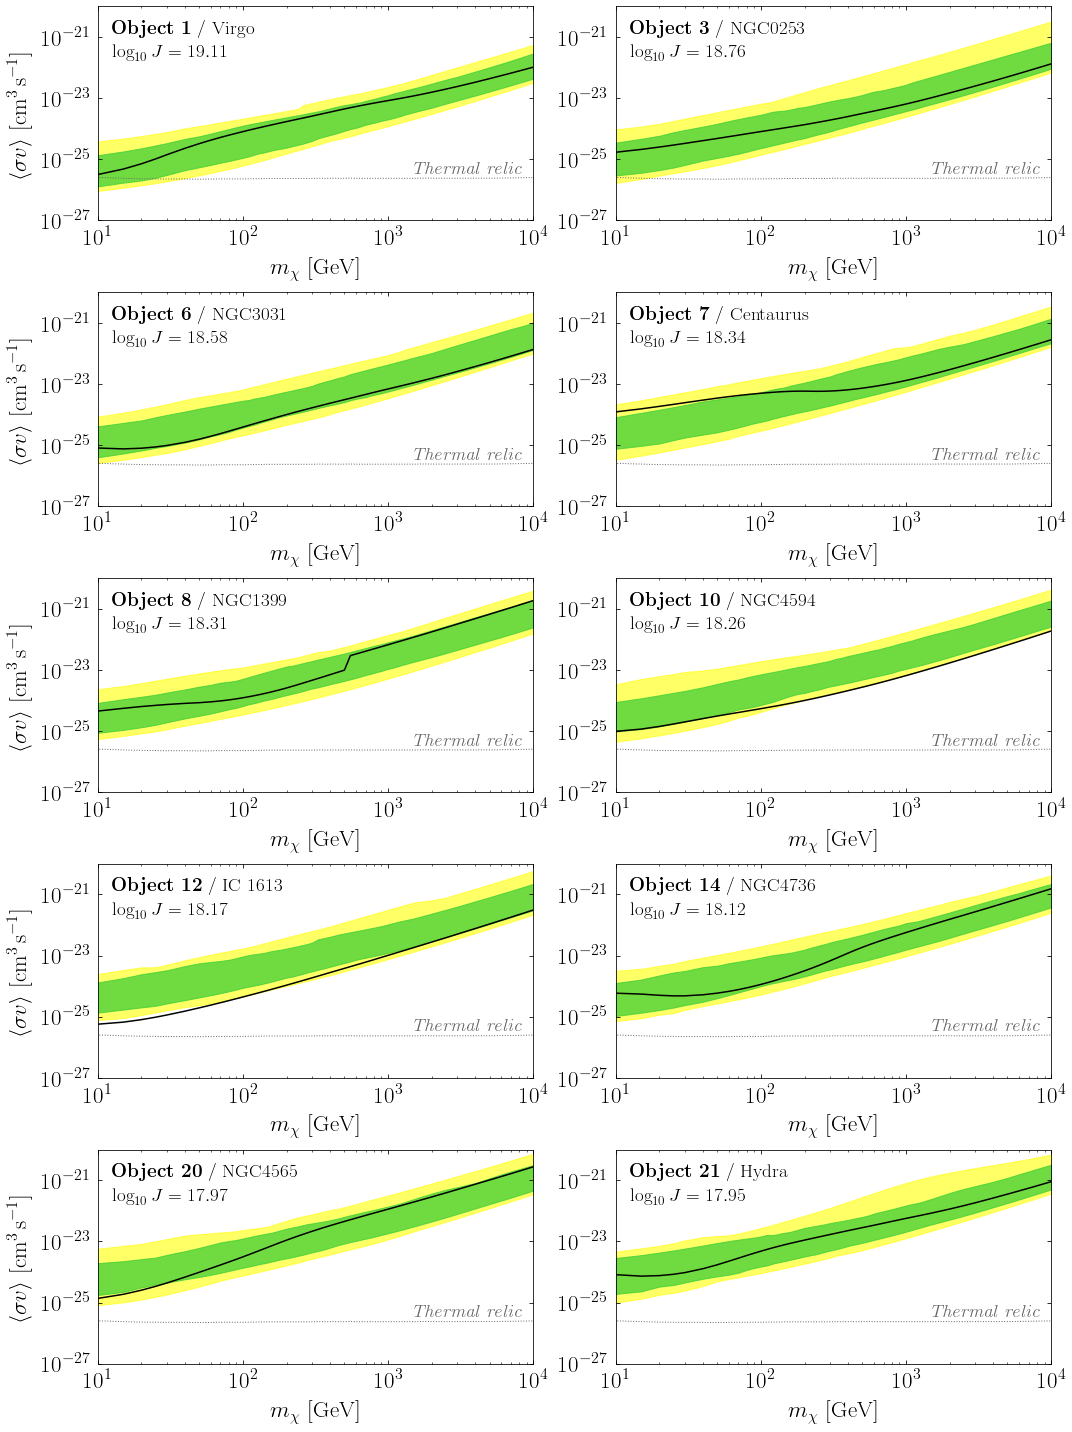

In [120]:
save_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/DataArrays/'

oFig1 = plt.figure(1,figsize=(15,20))

# for sidx in [0]:
for idx, i in enumerate(tqdm_notebook(plot_data.passed_halos[:10])):

    

    oFig1.add_subplot(5,2,idx+1)
    plt.fill_between(plot_data.marr,10**np.percentile(plot_single_mcs[idx], 2.5, axis=1),10**np.percentile(plot_single_mcs[idx], 97.5, axis=1), alpha=0.6, color='yellow')
    plt.fill_between(plot_data.marr,10**np.percentile(plot_single_mcs[idx], 16, axis=1),10**np.percentile(plot_single_mcs[idx], 84, axis=1), alpha=0.7, color='limegreen')
    plt.plot(plot_data.marr,10**np.percentile(plot_single_datas[idx], 2.5, axis=1), alpha=1., color='k',ls='-')
#     plt.plot(plot_data.marr, np.load("../data/Tully/LL2_TSmx_lim_b_o" + str(i) + "_data.npz")['lim'])
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10,10000)
    plt.ylim(10**-27,10**-20)
    plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
    plt.text(1500, 3.5e-26, r'\emph{Thermal relic}',fontsize=19.,color='dimgrey')

    plt.xticks(fontsize=23);
    plt.yticks(fontsize=23);
    plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)

    if idx % 2 == 0: plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$\,s$^{-1}$]",fontsize=23)
    if i in plot_data.passed_halos:
        plt.text(10**1.1,10**-20.85, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='k')
    else:
        plt.text(10**1.1,10**-20.85, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='red')
    plt.text(10**1.1,10**-21.8, '$\log_{10}J='+str(catalog['mulog10J_inf'].values[i])[:5] + "$", fontsize=19, color='k')#/(GeV$^2$ cm$^{-5}$)

    plt.legend(loc = 'upper right')
    plt.tight_layout()
plt.savefig(plots_dir + "data_individual_lims.pdf")



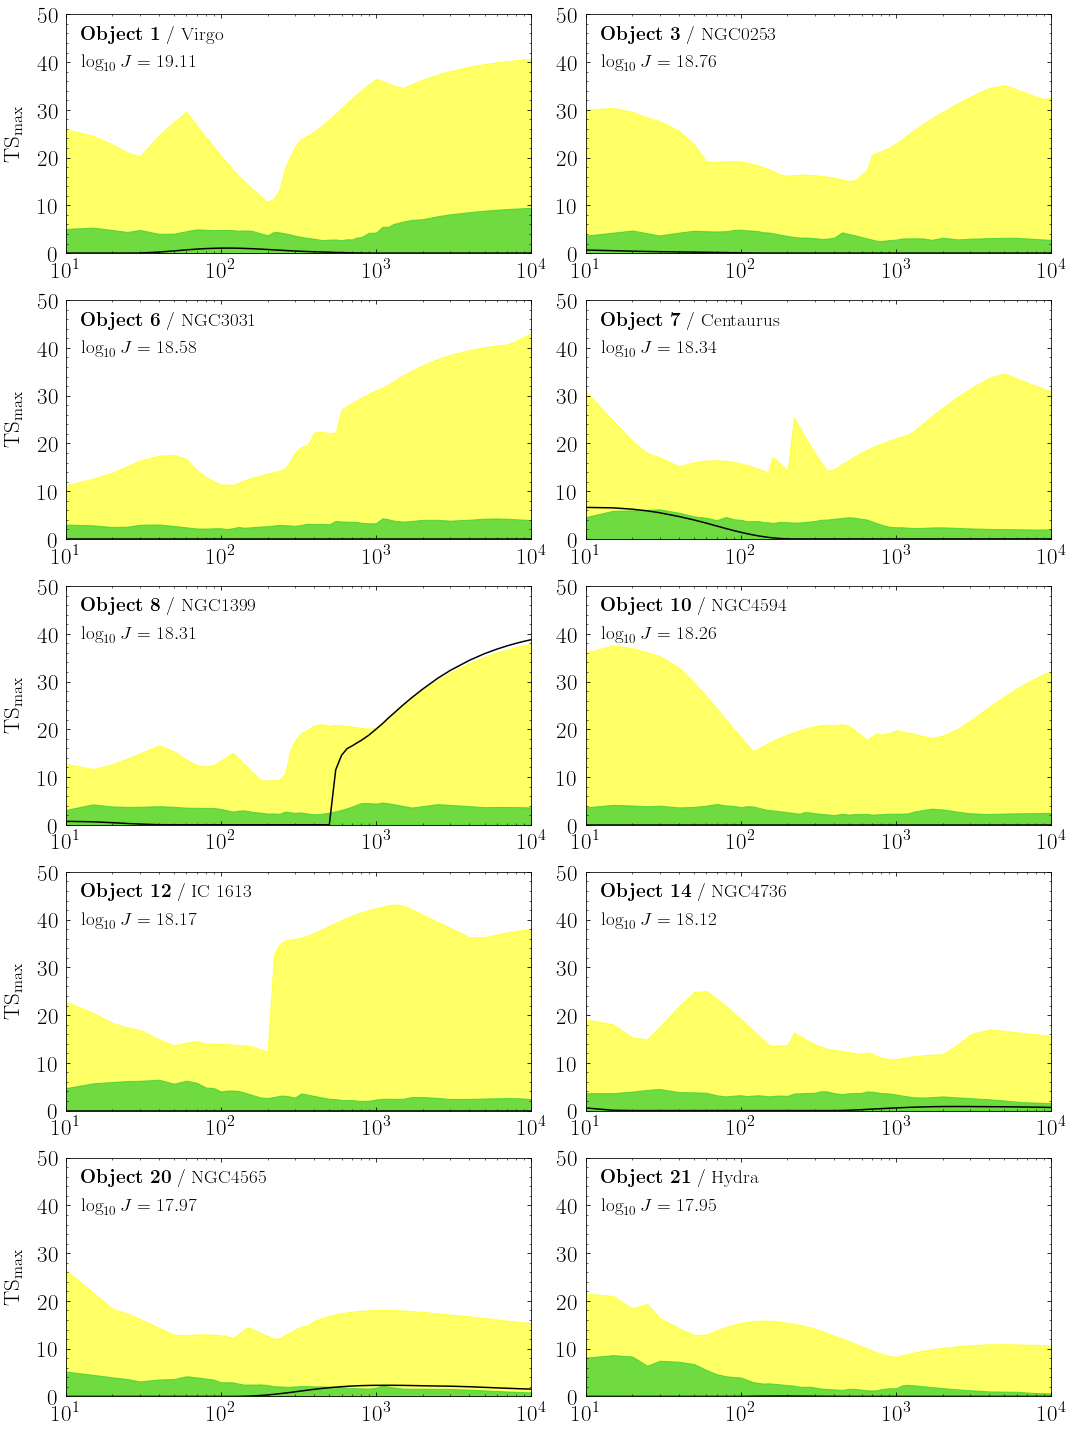

In [121]:
save_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/DataArrays/'

oFig1 = plt.figure(1,figsize=(15,20))

for idx, i in enumerate(tqdm_notebook(plot_data.passed_halos[:10])):
    oFig1.add_subplot(5,2,idx+1)
    plt.fill_between(plot_data.marr,np.percentile(maxts_single_mcs[idx], 2.5, axis=1),np.percentile(maxts_single_mcs[idx], 97.5, axis=1), alpha=0.6, color='yellow')
    plt.fill_between(plot_data.marr,np.percentile(maxts_single_mcs[idx], 16, axis=1),np.percentile(maxts_single_mcs[idx], 84, axis=1), alpha=0.7, color='limegreen')
    plt.plot(plot_data.marr,np.percentile(maxts_single_datas[idx], 2.5, axis=1), alpha=1., color='k',ls='-')

    plt.xscale("log")
    plt.xlim(10,10000)
    plt.ylim(0, 50)

    plt.xticks(fontsize=23);
    plt.yticks(fontsize=23);

    if idx % 2 == 0: plt.ylabel("TS$_\mathrm{max}$",fontsize=23)
    if i in plot_data.passed_halos:
        plt.text(10**1.1,45, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='k')
    else:
        plt.text(10**1.1,45, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='red')
    plt.text(10**1.1,38, '$\log_{10}J='+str(catalog['mulog10J_inf'].values[i])[:5] + "$", fontsize=19, color='k')#/(GeV$^2$ cm$^{-5}$)

plt.tight_layout()
plt.savefig(plots_dir + "data_individual_maxts.pdf")



In [146]:
plot_single_mcs_obj5 = []
plot_single_datas_obj5 = []

maxts_single_mcs_obj5 = []
maxts_single_datas_obj5 = []


for i in [5]:
    plot_single_mc_obj5, _, maxts_single_mc_obj5  = plot_data_skylocs.return_limits_single(i)
    plot_single_data_obj5, _, maxts_single_data_obj5= plot_data.return_limits_single(i)
    
    plot_single_mcs_obj5.append(plot_single_mc_obj5)
    plot_single_datas_obj5.append(plot_single_data_obj5)
    
    maxts_single_mcs_obj5.append(maxts_single_mc_obj5)
    maxts_single_datas_obj5.append(maxts_single_data_obj5)

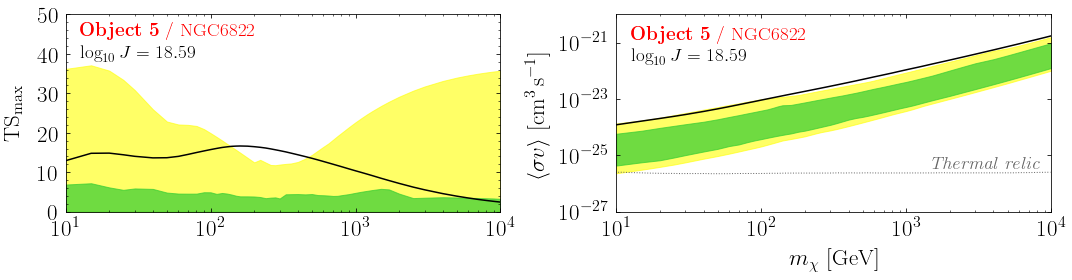

In [151]:
save_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/DataArrays/'

oFig1 = plt.figure(1,figsize=(15,4))

for idx, i in enumerate(tqdm_notebook(plot_data.passed_halos[:2])):
    if idx == 0:
        oFig1.add_subplot(1,2,idx+1)
        idx = 0
        i = 5
        plt.fill_between(plot_data.marr,np.percentile(maxts_single_mcs_obj5[idx], 2.5, axis=1),np.percentile(maxts_single_mcs_obj5[idx], 97.5, axis=1), alpha=0.6, color='yellow')
        plt.fill_between(plot_data.marr,np.percentile(maxts_single_mcs_obj5[idx], 16, axis=1),np.percentile(maxts_single_mcs_obj5[idx], 84, axis=1), alpha=0.7, color='limegreen')
        plt.plot(plot_data.marr,np.percentile(maxts_single_datas_obj5[idx], 2.5, axis=1), alpha=1., color='k',ls='-')

        plt.xscale("log")
        plt.xlim(10,10000)
        plt.ylim(0, 50)

        plt.xticks(fontsize=23);
        plt.yticks(fontsize=23);

        if idx % 2 == 0: plt.ylabel("TS$_\mathrm{max}$",fontsize=23)
        if i in plot_data.passed_halos:
            plt.text(10**1.1,45, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", "").replace(" ", ""), fontsize=19, color='k')
        else:
            plt.text(10**1.1,45, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", "").replace(" ", ""), fontsize=19, color='red')
        plt.text(10**1.1,38, '$\log_{10}J='+str(catalog['mulog10J_inf'].values[i])[:5] + "$", fontsize=19, color='k')#/(GeV$^2$ cm$^{-5}$)

    else:
        oFig1.add_subplot(1,2,idx+1)
        idx = 0
        i = 5
        plt.fill_between(plot_data.marr,10**np.percentile(plot_single_mcs_obj5[idx], 2.5, axis=1),10**np.percentile(plot_single_mcs_obj5[idx], 97.5, axis=1), alpha=0.6, color='yellow')
        plt.fill_between(plot_data.marr,10**np.percentile(plot_single_mcs_obj5[idx], 16, axis=1),10**np.percentile(plot_single_mcs_obj5[idx], 84, axis=1), alpha=0.7, color='limegreen')
        plt.plot(plot_data.marr,10**np.percentile(plot_single_datas_obj5[idx], 2.5, axis=1), alpha=1., color='k',ls='-')
    #     plt.plot(plot_data.marr, np.load("../data/Tully/LL2_TSmx_lim_b_o" + str(i) + "_data.npz")['lim'])
        plt.yscale("log")
        plt.xscale("log")
        plt.xlim(10,10000)
        plt.ylim(10**-27,10**-20)
        plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
        plt.text(1500, 3.5e-26, r'\emph{Thermal relic}',fontsize=19.,color='dimgrey')

        plt.xticks(fontsize=23);
        plt.yticks(fontsize=23);
        plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)

        if idx % 2 == 0: plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$\,s$^{-1}$]",fontsize=23)
        if i in plot_data.passed_halos:
            plt.text(10**1.1,10**-20.85, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", "").replace(" ", ""), fontsize=19, color='k')
        else:
            plt.text(10**1.1,10**-20.85, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", "").replace(" ", ""), fontsize=19, color='red')
        plt.text(10**1.1,10**-21.8, '$\log_{10}J='+str(catalog['mulog10J_inf'].values[i])[:5] + "$", fontsize=19, color='k')#/(GeV$^2$ cm$^{-5}$)

        plt.legend(loc = 'upper right')


plt.tight_layout()
plt.savefig(plots_dir + "object5_maxts_lim.pdf")



In [44]:
en_bins = 2*np.logspace(-1,3,41)
bin_centers = [10**((np.log10(en_bins[i])+np.log10(en_bins[i+1]))/2.) for i in range(40)]

en_stacked = np.vstack((en_bins,en_bins)).reshape((-1,),order='F')[1:-1]

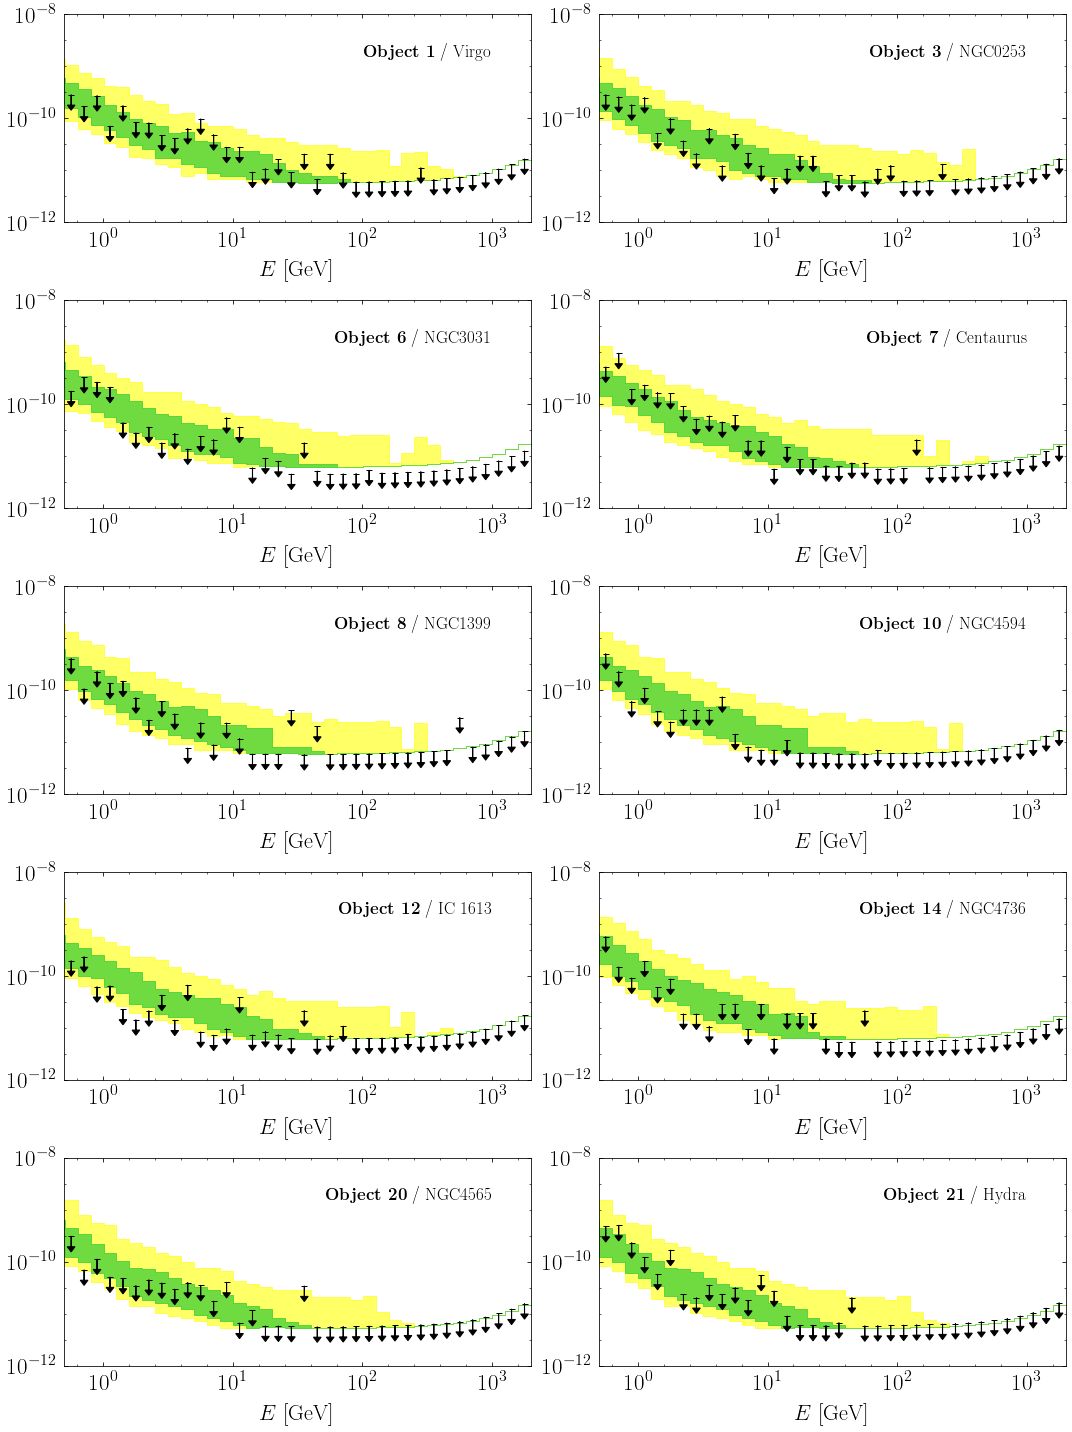

In [45]:
fig, axes2d = plt.subplots(nrows=5, ncols=2,
                           figsize=(15,20))

data_dir = "../data/Tully/"
sim_dir = "../data/Tully_randlocs"
for l, row in tqdm_notebook(enumerate(axes2d)):
    for j, cell in enumerate(row):
        ihalo = plot_data.passed_halos[l*2 + j] # l*2 + j
        halo = plot_data.passed_halos[l*2 + j]
        d_ivals = np.load(data_dir + 'LL_inten_o'+str(halo)+'_data.npz')['intens']
        d_lvals = np.load(data_dir + 'LL_inten_o'+str(halo)+'_data.npz')['LL']
        
        rep_angext = np.array([0.02785567,0.12069876,0.21354185,0.30638494,0.39922802,0.49207111,0.5849142,0.67775728,0.77060037,0.86344346,0.95628654,1.04912963,1.14197272,1.2348158,1.32765889,1.42050198,1.51334507,1.60618815,1.69903124,1.79187433])
        obj_angext = 2*catalog[u'rs'].values[ihalo] / \
                     (Planck15.angular_diameter_distance(catalog[u'z'].values[ihalo]).value*1000) \
                     * 180./np.pi
        rep_index = (np.abs(rep_angext-obj_angext)).argmin()
        
        s_ivals = np.load(sim_dir + '0/LL_inten_o'+str(rep_index)+'_data.npz')['intens'] # intensity the same for all MC

        nsim = 200
        sim_arr_all = np.zeros(shape=(nsim,40,200))

        limit_total = np.zeros((nsim, 40 ))

        for i in (range(nsim)):
            sim_arr_all[i] = np.load(sim_dir + str(i) + '/LL_inten_o'+str(rep_index)+'_data.npz')['LL']

        for i in (range(40)):
            tmp_TS = np.zeros(shape=(nsim,200))
            for j in range(nsim):
                tmp_TS[j] = 2*(sim_arr_all[j,i,:]-sim_arr_all[j,i,0])
                max_arg= np.argmax(tmp_TS[j])
                max_val = tmp_TS[j][max_arg]
                for xi in range(max_arg,len(s_ivals[i])):
                    val = tmp_TS[j][xi]-max_val
                    if val < -2.71:
                        limit_total[j, i] = s_ivals[i][xi]
                        break



        limit_data = np.zeros(40)
        for en in range(40):
            TS_data = 2*(d_lvals[en]-d_lvals[en,0])
            max_arg= np.argmax(TS_data)
            max_val = TS_data[max_arg]
            for xi in range(max_arg,len(d_ivals[en])):
                val = TS_data[xi]-max_val
                if val < -2.71:
                    limit_data[en] = d_ivals[en][xi]
                    break

        lims = np.transpose([corner.quantile(np.transpose(limit_total)[i],[.025,0.14,.68,0.975]) for i in range(40)])

        fluxlim_stacked = np.vstack((limit_data,limit_data)).reshape((-1,),order='F')[:]
        fluxlim_stacked_sim2p5 = np.vstack((lims[0],lims[0])).reshape((-1,),order='F')[:]
        fluxlim_stacked_sim16 = np.vstack((lims[1],lims[1])).reshape((-1,),order='F')[:]
        fluxlim_stacked_sim68 = np.vstack((lims[2],lims[2])).reshape((-1,),order='F')[:]
        fluxlim_stacked_sim97p5 = np.vstack((lims[3],lims[3])).reshape((-1,),order='F')[:]

        cell.fill_between(np.log10(en_stacked[4:]), np.log10(fluxlim_stacked_sim2p5[4:]),np.log10(fluxlim_stacked_sim97p5[4:]), color='yellow',alpha=0.6)
        cell.fill_between(np.log10(en_stacked[4:]), np.log10(fluxlim_stacked_sim16[4:]),np.log10(fluxlim_stacked_sim68[4:]), color='limegreen',alpha=0.7)
        
        cell.set_xlabel("$E$ [GeV]")
        
        if ihalo == 4:
            cell.set_ylabel("Flux [cm$^{-2}$ s$^{-1}$]")


        cell.set_xlim(np.log10(.5),np.log10(2000))
        cell.set_ylim(-12,-8)
        
        cell.set_yticks([-12,-10,-8])
        cell.set_yticklabels(["$10^{-12}$","$10^{-10}$","$10^{-8}$"], fontsize=23)
    

        cell.set_xticks([0,1,2,3])
        cell.set_xticklabels(["$10^{0}$","$10^{1}$","$10^{2}$","$10^{3}$"], fontsize=23)


        for i in range(4,len(bin_centers)):
            cell.arrow(np.log10(bin_centers[i]), np.log10(limit_data[i]), 0, -.3, length_includes_head=True,head_width=.06, head_length=.1, fc='k', ec='k')

        cell.errorbar(np.log10(bin_centers[4:]), np.log10(limit_data[4:]), marker='_',markersize= 6.,color='k',ls='none')

        cell.text(3.,-8.8, r'\textbf{Object '+str(halo)+'} / ' + catalog['paperName'].values[halo].replace("_", ""), fontsize=17, color='k',horizontalalignment='right')

plt.tight_layout()
plt.savefig(plots_dir + "FluxUL.pdf")

# max TS

In [168]:
maxTS_skylocs_ary = np.load("../notebooks/maxTS_skylocs_ary_ecut4_200.npy")

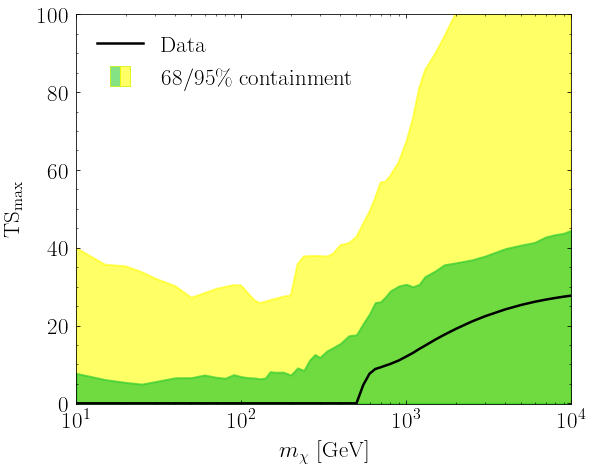

In [300]:
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

plt.plot(plot_data.marr,np.percentile(maxTS_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Data',lw=2.5)

plt.fill_between(plot_data.marr,np.percentile(maxTS_skylocs_ary[-1], 2.5, axis=1),np.percentile(maxTS_skylocs_ary[-1], 97.5, axis=1),color='yellow',label=r'95\% containment',alpha=0.6,lw=2)
plt.fill_between(plot_data.marr,np.percentile(maxTS_skylocs_ary[-1], 16, axis=1),np.percentile(maxTS_skylocs_ary[-1], 84, axis=1),color='limegreen',label=r'68\% containment',alpha=0.7,lw=2)

m3, = plt.plot([], [], c='limegreen' , marker='s', markersize=20,
              fillstyle='left', linestyle='none',alpha=0.6)

m4, = plt.plot([], [], c='yellow' , marker='s', markersize=20,
              fillstyle='right', linestyle='none',alpha=0.6)



plt.xscale("log")
# plt.yscale("log")

plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"TS$_\mathrm{max}$",fontsize=23)

plt.xlim([1e1,1e4])
# plt.ylim([8e-28,2e-22])
# plt.yscale("log")
# plt.text(15.3, 100, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')

handles,labels = ax.get_legend_handles_labels()
handles = [handles[0],(m3,m4)] #, handles[2]]
# labels = [labels[0], handles[1],labels[4],labels[3],labels[2]] #, labels[2]]

labels = [u'Data',
 u'$68/95\%$ containment']

# leg = plt.legend(handles,labels,loc=2,fontsize=17,fancybox=True,facecolor='none',frameon=False)



plt.legend(handles,labels, ncol=1,fancybox=True,facecolor='none',frameon=False, loc='upper left', fontsize=23)


plt.ylim(-0.1,100)
plt.tight_layout()

plt.savefig(plots_dir + 'global_maxts.pdf',bbox_inches='tight')

In [ ]:
plot_data_test = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=400000,
                        TS1000=9,
                        halos_ran=100, 
                        halos_to_keep=100,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

data_ary_test, _, maxTS_ary_test = plot_data_test.return_limits()

In [ ]:
save_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/DataArrays/'

oFig1 = plt.figure(1,figsize=(15,40))

for idx,i in tqdm_notebook(enumerate(range(20))):

    oFig1.add_subplot(10,2,idx+1)
#     plt.fill_between(plot_data.marr,np.percentile(maxTS_skylocs_ary[i], 2.5, axis=1),np.percentile(maxTS_skylocs_ary[i], 97.5, axis=1), alpha=0.6, color='yellow')
#     plt.fill_between(plot_data.marr,np.percentile(maxTS_skylocs_ary[i], 16, axis=1),np.percentile(maxTS_skylocs_ary[i], 84, axis=1), alpha=0.7, color='limegreen')
    plt.plot(plot_data.marr,np.percentile(maxTS_ary_test[i], 2.5, axis=1), alpha=1., color='k',ls='-')

    plt.xscale("log")
    plt.xlim(10,10000)
#     plt.ylim(0, 50)
    
#     plt.yscale("log")
    plt.xticks(fontsize=23);
    plt.yticks(fontsize=23);

    if i % 2 == 0: plt.ylabel("TS$_\mathrm{max}$",fontsize=23)
#     if i in plot_data.passed_halos:
#         plt.text(10**1.1,45, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='k')
#     else:
#         plt.text(10**1.1,45, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='red')
#     plt.text(10**1.1,38, '$\log_{10}J='+str(catalog['mulog10J_inf'].values[i])[:5] + "$ GeV$^2$ cm$^{-5}$ sr", fontsize=19, color='k')#/(GeV$^2$ cm$^{-5}$)

plt.tight_layout()
# plt.savefig(plots_dir + "data_individual_maxts.pdf")




# TS and xsec cuts

In [108]:
plot_data_TS16 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=16,
                        TS1000=16,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                                                file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")



In [83]:
plot_data_TS4 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=4,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                                                file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

plot_data_xsec20 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=20,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                                file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

plot_data_nocut = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10000000000,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                                                    file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")


plot_data_noverlap5 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=5.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                                                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")


plot_data_bcut15 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=15,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                                                     file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [109]:
data_ary_TS16, _, _ = plot_data_TS16.return_limits()

In [85]:
data_ary_TS4, _, _ = plot_data_TS4.return_limits()
data_ary_xsec20, _, _ = plot_data_xsec20.return_limits()
data_ary_nocut, _, _ = plot_data_nocut.return_limits()
data_ary_noverlap5, _, _ = plot_data_noverlap5.return_limits()
data_ary_bcut15, _, _ = plot_data_bcut15.return_limits()

In [88]:
plot_data_Andromeda = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                                                     file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                               skip_halos=[])

In [89]:
plot_data_NoVirgo = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                                                     file_prefix='LL2_TSmx_lim_b_emin4_o',
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                               skip_halos=[0,1])

In [90]:
data_ary_Andromeda, _, _ = plot_data_Andromeda.return_limits()
data_ary_NoVirgo, _, _ = plot_data_NoVirgo.return_limits()

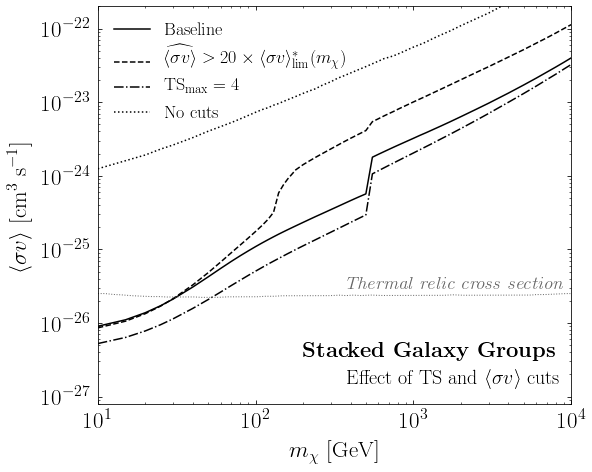

In [137]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline')
plt.plot(plot_data.marr,10**np.percentile(data_ary_xsec20[-1], 2.5, axis=1), alpha=1, color='k',label=r'$\widehat{\langle\sigma v\rangle} > 20 \times \langle\sigma v\rangle^*_\mathrm{lim}(m_\chi)$',ls='--')
plt.plot(plot_data.marr,10**np.percentile(data_ary_TS4[-1], 2.5, axis=1), alpha=1, color='k',label=r'TS$_\mathrm{max} = 4$',ls='-.')
plt.plot(plot_data.marr,10**np.percentile(data_ary_nocut[-1], 2.5, axis=1), alpha=1, color='k',label=r'No cuts',ls=':')




plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(200, 3.5e-27, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
plt.text(380., 1.5e-27, r'Effect of TS and $\langle\sigma v \rangle$ cuts',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False, loc="upper left")

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_cuts.pdf',bbox_inches='tight')

In [269]:
data_skylocs_nocut_ary = np.load("data_skylocs_ary_ecut4_nocuts_200.npy")

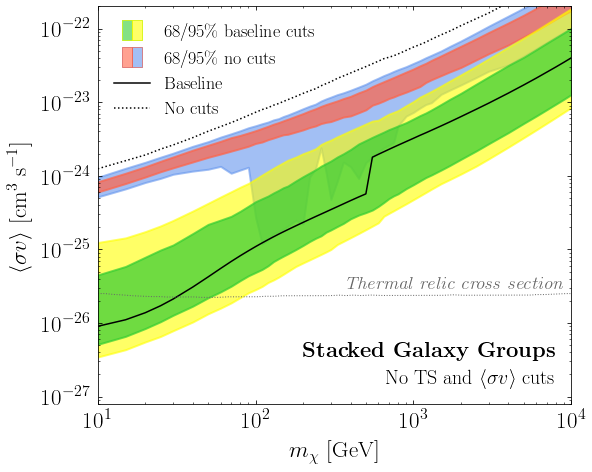

In [292]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_nocut_ary[len(data_ary)], 2.5, axis=1),10**np.percentile(data_skylocs_nocut_ary[len(data_ary)], 97.5, axis=1),color='cornflowerblue',label=r'95\% containment',alpha=0.6,lw=2)
plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_nocut_ary[len(data_ary)], 16, axis=1),10**np.percentile(data_skylocs_nocut_ary[len(data_ary)], 84, axis=1),color='tomato',label=r'68\% containment',alpha=0.7,lw=2)

plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[len(data_ary)], 2.5, axis=1),10**np.percentile(data_skylocs_ary[len(data_ary)], 97.5, axis=1),color='yellow',label=r'95\% containment',alpha=0.6,lw=2)
plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[len(data_ary)], 16, axis=1),10**np.percentile(data_skylocs_ary[len(data_ary)], 84, axis=1),color='limegreen',label=r'68\% containment',alpha=0.7,lw=2)


plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline')
# plt.plot(plot_data.marr,10**np.percentile(data_ary_xsec20[-1], 2.5, axis=1), alpha=1, color='k',label=r'$\widehat{\langle\sigma v\rangle} > 20 \times \langle\sigma v\rangle^*_\mathrm{lim}(m_\chi)$',ls='--')
# plt.plot(plot_data.marr,10**np.percentile(data_ary_TS4[-1], 2.5, axis=1), alpha=1, color='k',label=r'TS$_\mathrm{max} = 4$',ls='-.')
plt.plot(plot_data.marr,10**np.percentile(data_ary_nocut[-1], 2.5, axis=1), alpha=1, color='k',label=r'No cuts',ls=':')




plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(200, 3.5e-27, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
plt.text(670., 1.5e-27, r'No TS and $\langle\sigma v \rangle$ cuts',fontsize=20,color='black')

m1, = plt.plot([], [], c='tomato' , marker='s', markersize=20,
              fillstyle='left', linestyle='none',alpha=0.6)

m2, = plt.plot([], [], c='cornflowerblue' , marker='s', markersize=20,
              fillstyle='right', linestyle='none',alpha=0.6)

#---- Define Second Legend Entry ----

m3, = plt.plot([], [], c='limegreen' , marker='s', markersize=20,
              fillstyle='left', linestyle='none',alpha=0.6)

m4, = plt.plot([], [], c='yellow' , marker='s', markersize=20,
              fillstyle='right', linestyle='none',alpha=0.6)

m5, = plt.plot([], [], color='k')
m6, = plt.plot([], [], ls=':', color='k')

#---- Plot Legend ----

plt.legend(((m3, m4),(m2, m1),m5, m6,), ('68/95\% baseline cuts','68/95\% no cuts','Baseline','No cuts'), ncol=1,fancybox=True,facecolor='none',frameon=False, loc="upper left")


# plt.legend(ncol=2,fancybox=True,facecolor='none',frameon=False, loc="upper left")

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_nots_cuts.pdf',bbox_inches='tight')

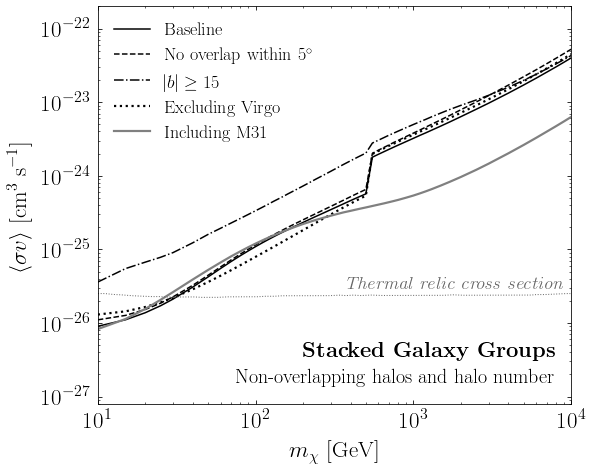

In [100]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline')
plt.plot(plot_data.marr,10**np.percentile(data_ary_noverlap5[-1], 2.5, axis=1), alpha=1, color='k',label=r'No overlap within 5$^\circ$',ls='--')
plt.plot(plot_data.marr,10**np.percentile(data_ary_bcut15[-1], 2.5, axis=1), alpha=1, color='k',label=r'$|b| \geq 15$',ls='-.')
plt.plot(plot_data.marr,10**np.percentile(data_ary_NoVirgo[-1], 2.5, axis=1), alpha=1, color='k',label=r'Excluding Virgo',ls='dotted', lw=2.2)
plt.plot(plot_data.marr,10**np.percentile(data_ary_Andromeda[-1], 2.5, axis=1), alpha=1, color='grey',label=r'Including M31',ls='-', lw=2.2)


# plt.plot(plot_data.marr,10**np.percentile(data_ary_10k[-1], 2.5, axis=1), alpha=1, color='k',label=r'10k halos',ls=':')




plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(200, 3.5e-27, r'\textbf{Stacked Galaxy Groups}',fontsize=22,color='black')
plt.text(75., 1.5e-27, r'Non-overlapping halos and halo number',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_nh.pdf',bbox_inches='tight')

In [ ]:
    hp.mollview("/tigress/nrodd/DM-Catalog-Scan/DataFiles/MonteCarlo/MC_allhalos_p7")